In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 200)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import joblib
from tqdm import tqdm

In [2]:
df = joblib.load('data_before_pca.sav')
df.head()

,age,bmi,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_wbc_max,d1_wbc_min,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,elective_surgery,ethnicity,gender,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,apache_post_operative,apache_3j_bodysystem,apache_2_bodysystem,temp_apache,d1_spo2_max,d1_spo2_min,d1_temp_min,h1_spo2_max,h1_spo2_min,h1_temp_min,d1_sodium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,hospital_death
0,68.0,3.166740,180.3,0.432864,4.316154,113.0,6.220610,0.0,3.465736,1.255616,3.000000,6.000000,0.000000,4.000000,5.129899,118.0,27.400000,0.0,40.0,36.0,134.000000,0.0,2.714695,4.234107,37.0,4.234107,37.0,119.0,72.0,4.499810,46.0,4.499810,46.0,3.555348,10.0,131.0,73.0,131.0,73.0,3.680704,68.0,63.0,68.000000,63.000000,119.0,108.0,86.0,85.0,86.000000,85.000000,3.295837,2.944439,131.0,115.0,131.000000,115.000000,39.500000,3.465736,3.433987,8.500000,7.400000,1.255616,1.172482,5.129899,4.700480,19.0000,15.000000,8.900000,8.900000,27.40000,27.400000,5.455321,5.455321,1.609438,3.400000,136.000000,2.714695,2.714695,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
1,77.0,3.347093,160.0,0.656368,4.265493,108.0,5.318169,0.0,2.302585,0.444686,1.000000,3.000000,0.000000,1.000000,4.983607,120.0,36.900000,0.0,46.0,33.0,145.000000,1.0,2.617396,4.564348,31.0,4.564348,31.0,118.0,72.0,4.795791,38.0,4.795791,38.0,3.496508,12.0,159.0,67.0,159.0,67.0,3.618993,61.0,48.0,61.000000,48.000000,114.0,100.0,85.0,57.0,85.000000,57.000000,3.465736,3.367296,95.0,71.0,95.000000,71.000000,36.300000,2.484907,2.302585,8.600000,8.000000,0.536493,0.444686,4.983607,4.859812,27.0000,26.000000,11.300000,11.100000,36.90000,36.100000,6.118100,6.110924,1.648659,3.800000,145.000000,3.190476,2.617396,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,2,1,1,1,2,1,2,2,2,1,1,2,2,1,2,2,1,1,0
2,25.0,3.494991,172.7,0.000694,4.567468,122.0,6.556821,0.0,3.289347,0.908264,3.000000,6.000000,0.000000,5.000000,5.083432,102.0,32.988739,0.0,68.0,37.0,137.966373,0.0,2.575153,4.488636,48.0,4.488636,48.0,96.0,68.0,4.634729,68.0,4.634729,68.0,3.091042,8.0,148.0,105.0,148.0,105.0,3.637586,88.0,58.0,88.000000,58.000000,96.0,78.0,91.0,83.0,91.000000,83.000000,3.044522,2.833213,148.0,124.0,148.000000,124.000000,36.700000,3.284130,3.209531,8.378881,8.179575,0.911740,0.861601,5.168425,4.748239,24.3665,23.170486,11.448195,10.887875,34.53197,32.951813,5.338046,5.287104,1.658532,3.934658,139.124101,2.600933,2.510699,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,2,2,2,1,2,1,3,3,1,2,1,1,2,1,1,2,2,2,0
3,81.0,3.162940,165.1,0.000694,4.138361,203.0,7.095918,0.0,3.289347,0.908264,4.000000,6.000000,0.000000,5.000000,5.225747,114.0,25.900000,1.0,60.0,4.0,137.966373,1.0,2.197225,3.919078,42.0,3.919078,42.0,116.0,92.0,4.442651,84.0,4.442651,84.0,3.178054

In [3]:
y = df['hospital_death']
X = df.drop(columns=['hospital_death'], axis=1)

Since bmi is representative of weight and height, we can keep bmi intact and drop weight and height.

In [4]:
X.drop(columns=['height', 'weight'], axis=1, inplace=True)

In [5]:
Xnum = X.select_dtypes(['int64', 'float64'])
print(Xnum.shape)
Xnum.head()

(167596, 84)


,age,bmi,pre_icu_los_days,apache_2_diagnosis,apache_3j_diagnosis,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_wbc_max,d1_wbc_min,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,68.0,3.166740,0.432864,113.0,6.220610,0.0,3.465736,1.255616,3.000000,6.000000,0.000000,4.000000,5.129899,118.0,27.400000,0.0,40.0,36.0,134.000000,0.0,2.714695,4.234107,37.0,4.234107,37.0,119.0,72.0,4.499810,46.0,4.499810,46.0,3.555348,10.0,131.0,73.0,131.0,73.0,3.680704,68.0,63.0,68.000000,63.000000,119.0,108.0,86.0,85.0,86.000000,85.000000,3.295837,2.944439,131.0,115.0,131.000000,115.000000,39.500000,3.465736,3.433987,8.500000,7.400000,1.255616,1.172482,5.129899,4.700480,19.0000,15.000000,8.900000,8.900000,27.40000,27.400000,5.455321,5.455321,1.609438,3.400000,136.000000,2.714695,2.714695,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,77.0,3.347093,0.656368,108.0,5.318169,0.0,2.302585,0.444686,1.000000,3.000000,0.000000,1.000000,4.983607,120.0,36.900000,0.0,46.0,33.0,145.000000,1.0,2.617396,4.564348,31.0,4.564348,31.0,118.0,72.0,4.795791,38.0,4.795791,38.0,3.496508,12.0,159.0,67.0,159.0,67.0,3.618993,61.0,48.0,61.000000,48.000000,114.0,100.0,85.0,57.0,85.000000,57.000000,3.465736,3.367296,95.0,71.0,95.000000,71.000000,36.300000,2.484907,2.302585,8.600000,8.000000,0.536493,0.444686,4.983607,4.859812,27.0000,26.000000,11.300000,11.100000,36.90000,36.100000,6.118100,6.110924,1.648659,3.800000,145.000000,3.190476,2.617396,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,25.0,3.494991,0.000694,122.0,6.556821,0.0,3.289347,0.908264,3.000000,6.000000,0.000000,5.000000,5.083432,102.0,32.988739,0.0,68.0,37.0,137.966373,0.0,2.575153,4.488636,48.0,4.488636,48.0,96.0,68.0,4.634729,68.0,4.634729,68.0,3.091042,8.0,148.0,105.0,148.0,105.0,3.637586,88.0,58.0,88.000000,58.000000,96.0,78.0,91.0,83.0,91.000000,83.000000,3.044522,2.833213,148.0,124.0,148.000000,124.000000,36.700000,3.284130,3.209531,8.378881,8.179575,0.911740,0.861601,5.168425,4.748239,24.3665,23.170486,11.448195,10.887875,34.53197,32.951813,5.338046,5.287104,1.658532,3.934658,139.124101,2.600933,2.510699,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,81.0,3.162940,0.000694,203.0,7.095918,0.0,3.289347,0.908264,4.000000,6.000000,0.000000,5.000000,5.225747,114.0,25.900000,1.0,60.0,4.0,137.966373,1.0,2.197225,3.919078,42.0,3.919078,42.0,116.0,92.0,4.442651,84.0,4.442651,84.0,3.178054,7.0,158.0,84.0,158.0,84.0,3.663562,62.0,44.0,75.805934,63.270616,100.0,96.0,92.0,71.0,91.594126,79.709315,2.564949,2.484907,136.0,106.0,133.054686,116.549625,35.600000,3.284130,3.209531,8.378881,8.179575,0.911740,0.861601,5.225747,4.488636,24.3665,23.170486,11.600000,8.900000,34.00000,25.900000,5.293305,4.339760,1.791759,3.500000,139.124101,2.302585,2.197225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,19.0,3.407372,0.071028,119.0,6.400274,0.0,3.289347,0.908264,3.465049,5.471195,0.009528,3.994778,5.083432,60.0,32.988739,0.0,103.0,1

In [6]:
Xcat = X[[col for col in X if col not in Xnum.columns]]
print(Xcat.shape)
Xcat.head()

(167596, 20)


,elective_surgery,ethnicity,gender,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,apache_post_operative,apache_3j_bodysystem,apache_2_bodysystem,temp_apache,d1_spo2_max,d1_spo2_min,d1_temp_min,h1_spo2_max,h1_spo2_min,h1_temp_min,d1_sodium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,2,1,1,1,2,1,2,2,2,1,1,2,2,1,2,2,1,1
2,1,1,2,2,2,1,2,1,3,3,1,2,1,1,2,1,1,2,2,2
3,2,1,2,3,3,1,1,2,4,1,2,1,2,2,1,2,2,2,2,1
4,1,1,1,2,2,1,2,1,5,4,1,1,2,1,1,2,1,2,1,1


# Feature Importance

In [7]:
# Calculating feature importance
def feature_importance(model):
    model.fit(X, y)
    feat_imp = pd.DataFrame()
    feat_imp["Features"] = X.columns
    feat_imp["Importance Value"] = model.feature_importances_
    plt.figure(figsize=(7,21))
    sns.barplot(data = feat_imp.sort_values("Importance Value", ascending=False), y='Features', x='Importance Value')
    plt.title("Feature Importances", fontsize=15)
    plt.show()

In [8]:
model = joblib.load('basemodel.sav')

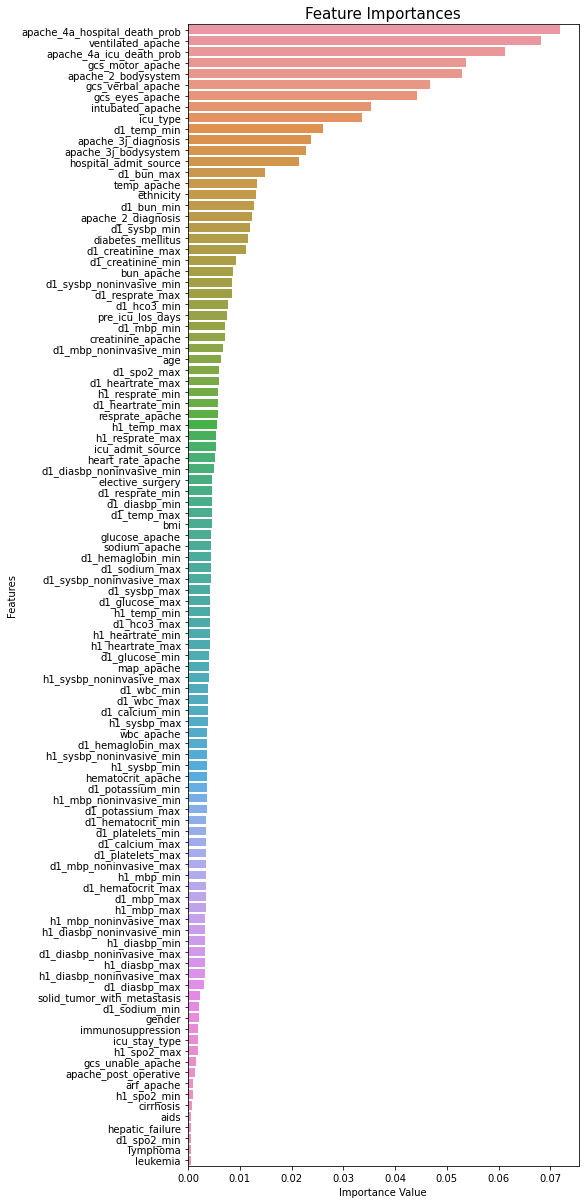

In [9]:
feature_importance(model)

Selecting top 10 features based on feature importance for building the model.

In [10]:
feat_imp = pd.DataFrame()
feat_imp["Features"] = X.columns
feat_imp["Importance Value"] = model.feature_importances_
feat_imp.sort_values("Importance Value", ascending=False).head(10)['Features'].to_list()

['apache_4a_hospital_death_prob',
 'ventilated_apache',
 'apache_4a_icu_death_prob',
 'gcs_motor_apache',
 'apache_2_bodysystem',
 'gcs_verbal_apache',
 'gcs_eyes_apache',
 'intubated_apache',
 'icu_type',
 'd1_temp_min']

In [11]:
X = X[['ventilated_apache',
 'gcs_verbal_apache',
 'gcs_motor_apache',
 'apache_4a_hospital_death_prob',
 'gcs_eyes_apache',
 'apache_2_bodysystem',
 'apache_4a_icu_death_prob',
 'icu_type',
 'apache_3j_bodysystem',
 'apache_3j_diagnosis']]
X.head()

,ventilated_apache,gcs_verbal_apache,gcs_motor_apache,apache_4a_hospital_death_prob,gcs_eyes_apache,apache_2_bodysystem,apache_4a_icu_death_prob,icu_type,apache_3j_bodysystem,apache_3j_diagnosis
0,0.0,4.000000,6.000000,1,3.000000,1,1,1,1,6.220610
1,1.0,1.000000,3.000000,1,1.000000,2,1,2,2,5.318169
2,0.0,5.000000,6.000000,2,3.000000,3,2,2,3,6.556821
3,1.0,5.000000,6.000000,2,4.000000,1,1,1,4,7.095918
4,0.0,3.994778,5.471195,1,3.465049,4,1,2,5,6.400274



Features with high multicollinearity based on VIF: 
 ['gcs_verbal_apache', 'gcs_motor_apache', 'apache_4a_hospital_death_prob', 'gcs_eyes_apache', 'apache_4a_icu_death_prob', 'apache_3j_bodysystem', 'apache_3j_diagnosis']


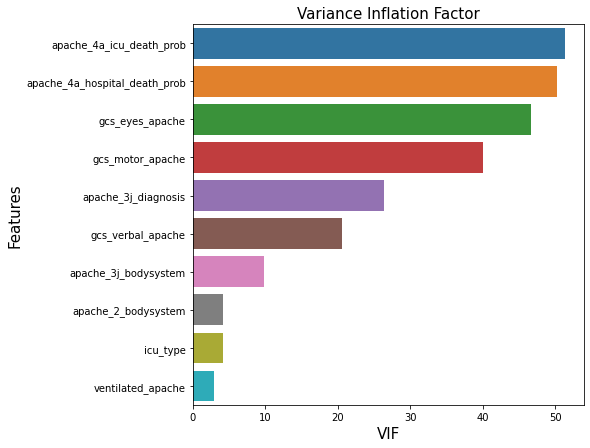

In [12]:
# Calculating Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

# Selecting features based on linearity and VIF < 5
selected_features = [vif.loc[i,'Features'] for i,k in enumerate(list(vif['VIF'].unique())) if k>5]
print("\nFeatures with high multicollinearity based on VIF: \n", selected_features)
fig = plt.figure(figsize=(7,7))
sns.barplot(data=vif.sort_values('VIF',ascending=False), y='Features', x='VIF')
plt.xlabel('VIF', fontsize=15)
plt.ylabel('Features', fontsize=15)
plt.title('Variance Inflation Factor', fontsize=15)
plt.show()

In [13]:
# dropping 'apache_4a_icu_death_prob'
X = X.drop(columns=['apache_4a_icu_death_prob'], axis=1)


Features with high multicollinearity based on VIF: 
 ['gcs_verbal_apache', 'gcs_motor_apache', 'apache_4a_hospital_death_prob', 'gcs_eyes_apache', 'apache_3j_bodysystem', 'apache_3j_diagnosis']


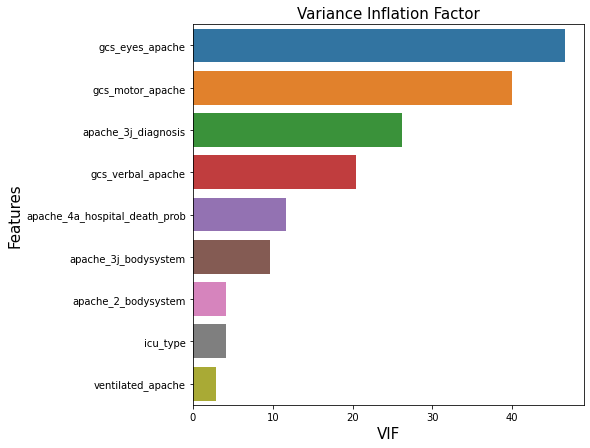

In [14]:
# Calculating Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

# Selecting features based on linearity and VIF < 5
selected_features = [vif.loc[i,'Features'] for i,k in enumerate(list(vif['VIF'].unique())) if k>5]
print("\nFeatures with high multicollinearity based on VIF: \n", selected_features)
fig = plt.figure(figsize=(7,7))
sns.barplot(data=vif.sort_values('VIF',ascending=False), y='Features', x='VIF')
plt.xlabel('VIF', fontsize=15)
plt.ylabel('Features', fontsize=15)
plt.title('Variance Inflation Factor', fontsize=15)
plt.show()

In [15]:
# dropping 'gcs_eyes_apache'
X = X.drop(columns=['gcs_eyes_apache'], axis=1)


Features with high multicollinearity based on VIF: 
 ['gcs_verbal_apache', 'gcs_motor_apache', 'apache_4a_hospital_death_prob', 'apache_3j_bodysystem', 'apache_3j_diagnosis']


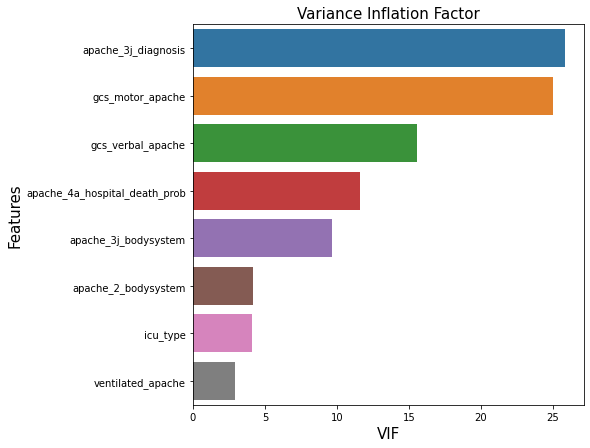

In [16]:
# Calculating Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

# Selecting features based on linearity and VIF < 5
selected_features = [vif.loc[i,'Features'] for i,k in enumerate(list(vif['VIF'].unique())) if k>5]
print("\nFeatures with high multicollinearity based on VIF: \n", selected_features)
fig = plt.figure(figsize=(7,7))
sns.barplot(data=vif.sort_values('VIF',ascending=False), y='Features', x='VIF')
plt.xlabel('VIF', fontsize=15)
plt.ylabel('Features', fontsize=15)
plt.title('Variance Inflation Factor', fontsize=15)
plt.show()

In [17]:
# dropping 'apache_3j_diagnosis' and 'icu_type'
X = X.drop(columns=['apache_3j_diagnosis', 'icu_type'], axis=1)


Features with high multicollinearity based on VIF: 
 ['gcs_verbal_apache', 'gcs_motor_apache', 'apache_4a_hospital_death_prob', 'apache_3j_bodysystem']


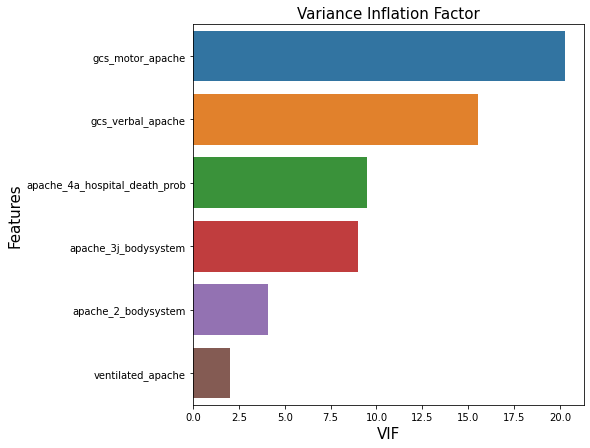

In [18]:
# Calculating Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

# Selecting features based on linearity and VIF < 5
selected_features = [vif.loc[i,'Features'] for i,k in enumerate(list(vif['VIF'].unique())) if k>5]
print("\nFeatures with high multicollinearity based on VIF: \n", selected_features)
fig = plt.figure(figsize=(7,7))
sns.barplot(data=vif.sort_values('VIF',ascending=False), y='Features', x='VIF')
plt.xlabel('VIF', fontsize=15)
plt.ylabel('Features', fontsize=15)
plt.title('Variance Inflation Factor', fontsize=15)
plt.show()

In [19]:
# dropping 'gcs_motor_apache'
X = X.drop(columns=['gcs_motor_apache'], axis=1)


Features with high multicollinearity based on VIF: 
 ['gcs_verbal_apache', 'apache_4a_hospital_death_prob', 'apache_3j_bodysystem']


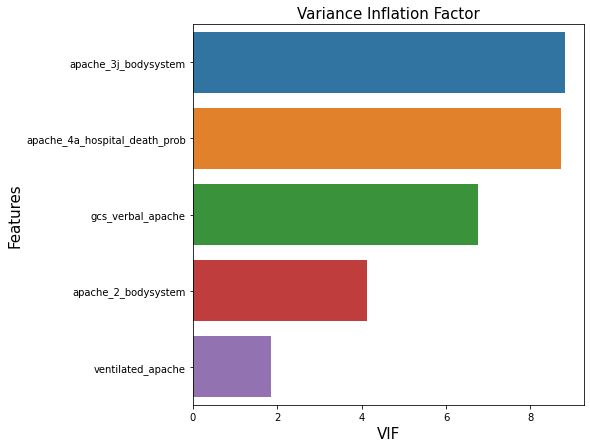

In [20]:
# Calculating Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

# Selecting features based on linearity and VIF < 5
selected_features = [vif.loc[i,'Features'] for i,k in enumerate(list(vif['VIF'].unique())) if k>5]
print("\nFeatures with high multicollinearity based on VIF: \n", selected_features)
fig = plt.figure(figsize=(7,7))
sns.barplot(data=vif.sort_values('VIF',ascending=False), y='Features', x='VIF')
plt.xlabel('VIF', fontsize=15)
plt.ylabel('Features', fontsize=15)
plt.title('Variance Inflation Factor', fontsize=15)
plt.show()

In [21]:
X = X[['apache_3j_bodysystem', 'apache_4a_hospital_death_prob', 'gcs_verbal_apache', 'apache_2_bodysystem','ventilated_apache']]
X.head()

,apache_3j_bodysystem,apache_4a_hospital_death_prob,gcs_verbal_apache,apache_2_bodysystem,ventilated_apache
0,1,1,4.000000,1,0.0
1,2,1,1.000000,2,1.0
2,3,2,5.000000,3,0.0
3,4,2,5.000000,1,1.0
4,5,1,3.994778,4,0.0


# Final Model

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rfc = RandomForestClassifier()

In [23]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Applying 15 fold cross validation

train_scores = cross_val_score(estimator=rfc,
                         X=train_x,
                         y=train_y,
                         scoring='accuracy',
                         cv=15,
                         n_jobs=-1,
                         verbose=3)

test_scores = cross_val_score(estimator=rfc,
                         X=test_x,
                         y=test_y,
                         scoring='accuracy',
                         cv=15,
                         n_jobs=-1,
                         verbose=3)


print("Accuracy on training data: ", np.mean(train_scores), "\n")
print("Accuracy on testing data: ", np.mean(test_scores))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:   14.5s remaining:   40.0s
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:   14.5s remaining:    7.2s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   19.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:    1.6s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:    1.7s remaining:    0.8s


Accuracy on training data:  0.8939482376983175 

Accuracy on testing data:  0.8903338881111318


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    2.7s finished


In [25]:
# Saving model
joblib.dump(rfc, 'final_model.sav')

['final_model.sav']

# Hyperparameter Tuning

In [26]:
import optuna
from sklearn.model_selection import StratifiedKFold

In [27]:
# tuner function
def tuner(objective):
    # Create Study object
    study = optuna.create_study(direction="maximize")

    # Optimize the study
    study.optimize(objective, n_trials=5)

    # Print the result
    best_params = study.best_params
    best_score = study.best_value
    print(f"Best score: {best_score}")
    print(f"Optimized parameters: {best_params}\n")
    print("<<<<<<<<<< Tuning complete... >>>>>>>>>>")
    
    # Return best parameters for the model
    return best_params, best_score

In [28]:
# Setting random seed and kfolds for cross-validation
kfolds = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)

### Tuning

In [41]:
# Objective function
def rfc_objective(trial):
    # Dictionary to store best parameters
    param = {
        "n_estimators": trial.suggest_int("n_estimators", 400, 700),
#        "max_depth": trial.suggest_int("max_depth", 10, 25),
#         "min_samples_leaf": trial.suggest_int("min_samples_leaf", 15, 50),
#         "min_weight_fraction_leaf": trial.suggest_int("min_weight_fraction_leaf", 0.01, 1),
#         "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2", "auto"]),
#         "max_samples": trial.suggest_float("max_samples", 0.01, 1),
#         "verbose":3
    }
     
    model = RandomForestClassifier(**param)
    
    scores = cross_val_score(model, X, y, cv=kfolds, scoring="accuracy")
    return scores.mean()

In [42]:
%%time
rf_param, rf_score = tuner(rfc_objective)

rfc1 = RandomForestClassifier(**rf_param)

[I 2021-12-12 12:43:18,415] A new study created in memory with name: no-name-4a9c4c3e-e2d8-4310-9caa-be18f6f5a00f
[I 2021-12-12 12:50:46,783] Trial 0 finished with value: 0.8944008274483882 and parameters: {'n_estimators': 612}. Best is trial 0 with value: 0.8944008274483882.
[I 2021-12-12 12:56:17,008] Trial 1 finished with value: 0.8943709936227968 and parameters: {'n_estimators': 451}. Best is trial 0 with value: 0.8944008274483882.
[I 2021-12-12 13:02:03,561] Trial 2 finished with value: 0.8944008274483882 and parameters: {'n_estimators': 473}. Best is trial 0 with value: 0.8944008274483882.
[I 2021-12-12 13:07:58,057] Trial 3 finished with value: 0.8944545283344529 and parameters: {'n_estimators': 473}. Best is trial 3 with value: 0.8944545283344529.
[I 2021-12-12 13:15:42,766] Trial 4 finished with value: 0.8944246945088614 and parameters: {'n_estimators': 603}. Best is trial 3 with value: 0.8944545283344529.


Best score: 0.8944545283344529
Optimized parameters: {'n_estimators': 473}

<<<<<<<<<< Tuning complete... >>>>>>>>>>
Wall time: 32min 24s


In [43]:
# Applying 15 fold cross validation

train_scores = cross_val_score(estimator=rfc1,
                         X=train_x,
                         y=train_y,
                         scoring='accuracy',
                         cv=15,
                         n_jobs=-1,
                         verbose=3)

test_scores = cross_val_score(estimator=rfc1,
                         X=test_x,
                         y=test_y,
                         scoring='accuracy',
                         cv=15,
                         n_jobs=-1,
                         verbose=3)


print("Accuracy on training data: ", np.mean(train_scores), "\n")
print("Accuracy on testing data: ", np.mean(test_scores))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:  1.1min remaining:  3.0min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:  1.1min remaining:   33.7s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:    7.7s remaining:   21.4s
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:    7.8s remaining:    3.8s


Accuracy on training data:  0.8939706115656405 

Accuracy on testing data:  0.890841012432764


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   12.3s finished
